In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
sys.path.insert(1,'/pd/maya/domino/domino')

### Mimic Slice Eval

In [3]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs
pd.set_option('display.max_rows', 1000)


/home/sabri/code/meerkat/meerkat/nn/__init__.py:7: ExperimentalWarning: The `meerkat.nn` module is experimental and has limited test coverage. Proceed with caution.
  warnings.warn(


In [43]:
#setting_dp =run_sdms.out(18285).load() #CLIP
#setting_dp = run_sdms.out(20871).load() #MULTIMODAL
#setting_dp = run_sdms.out(39259).load() #temp mult-emb test
#setting_dp = run_sdms.out(40598).load() #SYNTHETIC CORRELATION
#setting_dp = run_sdms.out(48201).load() #Synthetic rare -geomspace
#setting_dp = run_sdms.out(51208).load()
setting_dp = run_sdms.out(52180).load()
setting_dp
#dp, _ = run_sdm.out(18287)
#dp.load()
#np.array(dp.load()['pred_slices'])
#dp, _ = run_sdm.out(run_id=row["run_sdm_run_id"])
#metrics_df = compute_sdm_metrics(dp.load())


,score_model_run_id (NumpyArrayColumn),setting_id (PandasSeriesColumn),build_setting_run_id (NumpyArrayColumn),score_settings_run_id (NumpyArrayColumn),synthetic_preds (NumpyArrayColumn),index (PandasSeriesColumn),alpha (NumpyArrayColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),slice_category (PandasSeriesColumn),slice_names (ListColumn),target_name (PandasSeriesColumn),run_sdm_run_id (PandasSeriesColumn),emb_group (PandasSeriesColumn),time_this_iter_s (PandasSeriesColumn),done (PandasSeriesColumn),timesteps_total (PandasSeriesColumn),episodes_total (PandasSeriesColumn),training_iteration (PandasSeriesColumn),experiment_id (PandasSeriesColumn),date (PandasSeriesColumn),timestamp (PandasSeriesColumn),time_total_s (PandasSeriesColumn),pid (PandasSeriesColumn),hostname (PandasSeriesColumn),node_ip (PandasSeriesColumn),time_since_restore (PandasSeriesColumn),timesteps_since_restore (PandasSeriesColumn),iterations_since_restore (PandasSeriesColumn),trial_id (PandasSeriesColumn),sdm_config/weight_y_log_likelihood (PandasSeriesColumn),sdm_config/n_slices (PandasSeriesColumn),sdm_config/emb (PandasSeriesColumn),sdm_config/xmodal_emb (PandasSeriesColumn),config/sdm (PandasSeriesColumn),config/slice (PandasSeriesColumn),logdir (PandasSeriesColumn),sdm_class (PandasSeriesColumn)
0,53066.0,62af8d87-21e8-4706-a5d5-924f85180f74,53066.0,53065.0,True,0,0.01,"{'target_name': 'lung_group', 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'slice_frac': 0.01, 'n': 30000}",mimic,rare,['lung_opacity'],lung_group,53143.0,imagenet,18.684819,False,NaN,NaN,1.0,db7d3201f09f43109eded95e3d6a9f05,2021-09-30_03-48-16,1.632974e+09,18.684819,99176.0,pod-maya,10.92.2.3,18.684819,0.0,1.0,25822_00000,1.0,5.0,emb,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['imagenet', 'emb'], 'n_slices': 5, 'weight_y_log_likelihood': 1, 'xmodal_emb': 'emb'}}","{'alpha': 0.01, 'build_setting_kwargs': {'n': 30000, 'slice_frac': 0.01, 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'target_name': 'lung_group'}, 'build_setting_run_id': 53066, 'dataset': 'mimic', 'index': '0', 'score_model_run_id': 53066, 'score_settings_run_id': 53065, 'setting_id': '62af8d87-21e8-4706-a5d5-924f85180f74', 'slice_category': 'rare', 'slice_names': ['lung_opacity'], 'synthetic_preds': 'True', 'target_name': 'lung_group'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/53129/_evaluate_2021-09-30_03-47-34/_evaluate_25822_00000_0_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 1, '_2021-09-30_03-47-36",domino.sdm.gmm.MixtureModelSDM
1,53066.0,62af8d87-21e8-4706-a5d5-924f85180f74,53066.0,53065.0,True,1,0.01,"{'target_name': 'lung_group', 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'slice_frac': 0.01, 'n': 30000}",mimic,rare,['lung_opacity'],lung_group,53139.0,bit,20.939223,False,NaN,NaN,1.0,640bfb1f84ad4500aaa4dd6aae80703f,2021-09-30_03-48-18,1.632974e+09,20.939223,99175.0,pod-maya,10.92.2.3,20.939223,0.0,1.0,25822_00001,1.0,5.0,body,emb,"{'sdm_class': '', 'sdm_config': {'emb': ['bit', 'body'], 'n_slices': 5, 'weight_y_log_likelihood': 1, 'xmodal_emb': 'emb'}}","{'alpha': 0.01, 'build_setting_kwargs': {'n': 30000, 'slice_frac': 0.01, 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'target_name': 'lung_group'}, 'build_setting_run_id': 53066, 'dataset': 'mimic', 'index': '0', 'score_model_run_id': 53066, 'score_settings_run_id': 53065, 'setting_id': '62af8d87-21e8-4706-a5d5-924f85180f74', 'slice_category': 'rare', 'slice_names': ['lung_opacity'], 'synthetic_preds': 'True', 'target_name': 'lung_group'}","/home/sabri/terra/slice/tasks/evaluate/run_sdms/_runs/53129/_evaluate_2021-09-30_03-47-34/_evaluate_25822_00001_1_sdm={'sdm_class': , 'sdm_config': {'weight_y_log_likelihood': 1, '_2021-09-30_03-47-36",domino.sdm.gmm.MixtureModelSDM
2,53066.0,62af8d87-21e8-4706-a5d5-924f85180f74,53066.0,53065.0,True,2,0.01,"{'target_name': 'lung_group', 'slice_name': 'lung_opacity', 'target_frac': 0.5, 'slice_frac': 0.01, 'n': 30000}",mimic,rare,['lung_opacity'],lung_gr

In [44]:
#slice_df=score_sdms.out(19177).load() #CLIP
#slice_df = score_sdms.out(21752).load() #MULTIMODAL
#slice_df = score_sdms.out(40360).load() #temporary multi-emb test
#slice_df = score_sdms.out(45159).load() #SYNTHETIC CORRELATION
#slice_df = score_sdms.out(49112).load() #synthetic rare -geomspace
slice_df = score_sdms.out(53061).load() 


In [45]:
slice_df = pd.DataFrame(slice_df)
print(slice_df.shape)
print(len(set(slice_df['slice_name'])))
#slice_df[:100]

(4400, 14)

11

In [46]:
score_dp = mk.DataPanel.from_pandas(slice_df)
results_dp = mk.merge(
    score_dp,
    setting_dp["config/sdm", "alpha","run_sdm_run_id"], # include any other columns here you'd like to analyze
    on="run_sdm_run_id"
)
emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0])
results_dp["emb_type"] = emb_col

results_df = results_dp.to_pandas()
results_df


,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
0,53143,0,0,0.459095,0.0,0.00,0.00,0.000000,0.000000,0.034483,0.034483,0.000887,lung_group,lung_opacity,0,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,imagenet
1,53143,1,0,0.605581,0.0,0.00,0.00,0.000000,0.000000,0.137931,0.241379,0.008197,lung_group,lung_opacity,1,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,imagenet
2,53143,2,0,0.748744,0.0,0.00,0.01,0.000000,0.034483,0.068966,0.448276,0.009194,lung_group,lung_opacity,2,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,imagenet
3,53143,3,0,0.641065,0.0,0.00,0.01,0.000000,0.034483,0.034483,0.241379,0.003848,lung_group,lung_opacity,3,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,imagenet
4,53143,4,0,0.484190,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.034483,0.001353,lung_group,lung_opacity,4,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,imagenet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,54434,0,0,0.500000,0.0,0.04,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,cardio_group,cardiomegaly,4395,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,mimic_multimodal
4396,54434,1,0,0.971418,0.7,0.68,0.67,0.217391,0.416149,0.645963,1.000000,0.101194,cardio_group,cardiomegaly,4396,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,mimic_multimodal
4397,54434,2,0,0.121420,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,cardio_group,cardiomegaly,4397,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,mimic_multimodal
4398,54434,3,0,0.098622,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,cardio_group,cardiomegaly,4398,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,mimic_multimodal


In [47]:
grouped_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha", "emb_type"])['precision_at_10'].idxmax().astype(int)]
grouped_df

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,slice_name,index,config/sdm,alpha,emb_type
2029,53535,4,0,0.898020,0.4,0.32,0.13,0.333333,0.481481,0.555556,0.777778,0.005897,lung_group,atelectasis,2029,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,bit
2074,53544,4,0,0.967237,0.4,0.16,0.11,0.148148,0.407407,0.666667,0.703704,0.008708,lung_group,atelectasis,2074,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,clip
2042,53540,2,0,0.914000,0.2,0.12,0.08,0.185185,0.296296,0.555556,0.851852,0.009160,lung_group,atelectasis,2042,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,imagenet
2059,53541,4,0,0.933289,0.3,0.28,0.16,0.370370,0.592593,0.703704,0.851852,0.011886,lung_group,atelectasis,2059,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0100,mimic_multimodal
2105,53550,0,0,0.902162,0.6,0.44,0.28,0.187500,0.291667,0.447917,0.208333,0.051680,lung_group,atelectasis,2105,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0325,bit
2113,53551,3,0,0.822488,0.6,0.52,0.30,0.218750,0.312500,0.364583,0.427083,0.033717,lung_group,atelectasis,2113,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0325,clip
2121,53554,1,0,0.948678,0.6,0.44,0.31,0.208333,0.322917,0.520833,0.604167,0.032312,lung_group,atelectasis,2121,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0325,imagenet
2116,53553,1,0,0.888729,0.6,0.36,0.25,0.166667,0.260417,0.354167,0.729167,0.034130,lung_group,atelectasis,2116,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0325,mimic_multimodal
2188,53568,3,0,0.884407,0.9,0.64,0.44,0.147059,0.258824,0.382353,0.288235,0.054444,lung_group,atelectasis,2188,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0550,bit
2211,53572,1,0,0.932329,0.9,0.68,0.45,0.176471,0.264706,0.447059,0.570588,0.068600,lung_group,atelectasis,2211,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.0550,clip


/tmp/ipykernel_49828/393514103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.5)
/tmp/ipykernel_49828/393514103.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df["alpha"] = grouped_df["alpha"].round(3)


Text(0.5, 1.0, 'Slice Type: Rare')

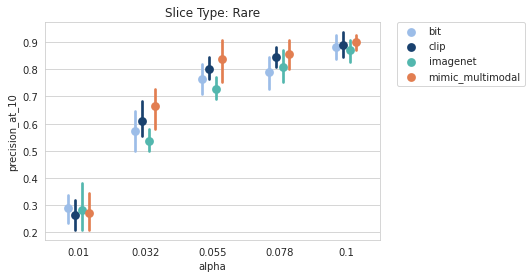

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
grouped_df['success'] = (grouped_df['auroc']>0.85) & (grouped_df['precision_at_10']>0.5)
#grouped_df['success'] = (grouped_df['precision_at_25']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')
palette = ["#9cbde8", "#19416e", "#53b7ae", "#e27e51", "#efab79", "#1b6c7b"]

sns.set_style("whitegrid")
sns.despine()
grouped_df["alpha"] = grouped_df["alpha"].round(3)
sns.pointplot(
    data=grouped_df, hue="emb_type", y="precision_at_10", x="alpha", linestyles="", dodge=0.3, palette=sns.color_palette(palette, 6), 
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Slice Type: Rare')

#plt.savefig("mimic_correlation.pdf")

In [ ]:
multimodal_df = results_df.iloc[results_df.reset_index().groupby(["slice_name", "slice_idx", "alpha"])['auroc'].idxmax().astype(int)]
multimodal_df[:10]

/tmp/ipykernel_15973/599967079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
/tmp/ipykernel_15973/599967079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multimodal_df["alpha"] = multimodal_df["alpha"].round(1)


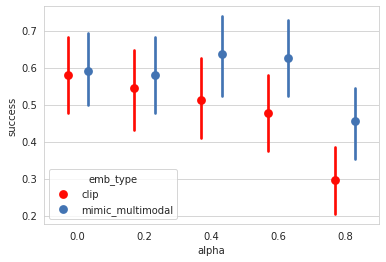

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
#alpha_df = grouped_df[grouped_df['alpha']==0.0]
multimodal_df['success'] = (multimodal_df['auroc']>0.85) & (multimodal_df['precision_at_10']>0.5)
#sns.barplot(data=grouped_df, x="alpha", y="success", color='orange')
#sns.pointplot(data=grouped_df, x="alpha", y="success", color='darkorange', dodge=True, join=False)
#plt.title('mimic with correlation slices')

sns.set_style("whitegrid")
sns.despine()
multimodal_df["alpha"] = multimodal_df["alpha"].round(1)
frames = [grouped_df, multimodal_df]
result = pd.concat(frames)

sns.pointplot(
    data=result, palette=["C0", "C1", "k"], hue='emb_type', color="purple", y="success", x="alpha", linestyles="", dodge=0.3,  
    
)
#sns.pointplot(
#    data=grouped_df, color="darkorange", y="success", x="alpha", linestyles="", dodge=0.3,  
#)
plt.savefig("mimic_correlation.pdf")

### test

In [30]:
from domino.train import score_settings, synthetic_score_settings, train_settings

setting_dp = synthetic_score_settings.out(38439).load()

In [31]:
setting_dp[:20]

,setting_id (PandasSeriesColumn),build_setting_run_id (NumpyArrayColumn),score_model_run_id (NumpyArrayColumn),score_settings_run_id (NumpyArrayColumn),synthetic_preds (NumpyArrayColumn),index (PandasSeriesColumn),alpha (NumpyArrayColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),slice_category (PandasSeriesColumn),slice_names (ListColumn),target_name (PandasSeriesColumn)
0,7f631e49-ed3d-4fe5-bfd8-65828b4f2987,38440.0,38440.0,38439.0,True,0,0.0,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
1,765e0bd2-2c6e-48c2-a4ee-e04b23bd929a,38441.0,38441.0,38439.0,True,1,0.2,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.2}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
2,2b6f38ca-420d-454d-9ad3-bff22f682d52,38442.0,38442.0,38439.0,True,2,0.4,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.4}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
3,9193d4e4-d014-4645-bc54-1fcbcad1e9fc,38443.0,38443.0,38439.0,True,3,0.6,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.6000000000000001}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
4,fbde748b-2b20-4c07-891d-f7d11d222f7b,38444.0,38444.0,38439.0,True,4,0.8,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.8}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis
...,...,...,...,...,...,...,...,...,...,...,...,...
15,742b626e-2989-48c3-91c9-be4f47c37ed8,38462.0,38462.0,38439.0,True,15,0.0,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis
16,b06b1e57-aac5-4459-a1a6-699b38e2ea83,38463.0,38463.0,38439.0,True,16,0.2,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.2}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis
17,c93e7244-2026-4e77-a21b-183d10315732,38176.0,38176.0,38439.0,True,17,0.4,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.4}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis
18,e31202e9-1606-4f26-8aeb-571cd47346b4,38464.0,38464.0,38439.0,True,18,0.6,"{'n': 30000, 'correlate': 'support_devices', 'target': 'atelectasis', 'corr': 0.6000000000000001}",mimic,correlation,"['atelectasis=0_support_devices=1', 'atelectasis=1_support_devices=0']",atelectasis


## Compute Baseline Distributions

In [64]:
a = mk.DataPanel.read("/pd/maya/mimic_dp_adjusted_diagnoses.mk")
a.shape

(377110, 67)

In [68]:
dicom_ids = list(a.lz[a['slice_assigned_split']=='test']['dicom_id'])

In [69]:
import numpy as np

In [70]:
from domino.slices.abstract import build_setting

,subject_id (PandasSeriesColumn),dicom_id (PandasSeriesColumn),study_id (PandasSeriesColumn),dicom_path (PandasSeriesColumn),gender (PandasSeriesColumn),anchor_age (PandasSeriesColumn),anchor_year (PandasSeriesColumn),anchor_year_group (PandasSeriesColumn),dod (PandasSeriesColumn),dicom (PandasSeriesColumn),study_date (PandasSeriesColumn),image_type (PandasSeriesColumn),table_type (PandasSeriesColumn),distance_source_to_detector (PandasSeriesColumn),distance_source_to_patient (PandasSeriesColumn),exposure (PandasSeriesColumn),exposure_time (PandasSeriesColumn),x_ray_tube_current (PandasSeriesColumn),field_of_view_rotation (PandasSeriesColumn),field_of_view_origin (PandasSeriesColumn),field_of_view_horizontal_flip (PandasSeriesColumn),view_position (PandasSeriesColumn),patient_orientation (PandasSeriesColumn),burned_in_annotation (PandasSeriesColumn),requesting_service (PandasSeriesColumn),detector_primary_angle (PandasSeriesColumn),detector_element_physical_size (PandasSeriesColumn),report_path (PandasSeriesColumn),hadm_id (PandasSeriesColumn),admittime (PandasSeriesColumn),dischtime (PandasSeriesColumn),deathtime (PandasSeriesColumn),admission_type (PandasSeriesColumn),admission_location (PandasSeriesColumn),discharge_location (PandasSeriesColumn),insurance (PandasSeriesColumn),language (PandasSeriesColumn),marital_status (PandasSeriesColumn),ethnicity (PandasSeriesColumn),edregtime (PandasSeriesColumn),edouttime (PandasSeriesColumn),hospital_expire_flag (PandasSeriesColumn),index (PandasSeriesColumn),jpg_path (PandasSeriesColumn),cxr_jpg (GCSImageColumn),cxr_dicom (GCSImageColumn),cxr_jpg_1024 (ImageColumn),atelectasis (PandasSeriesColumn),cardiomegaly (PandasSeriesColumn),consolidation (PandasSeriesColumn),edema (PandasSeriesColumn),enlarged_cardiomediastinum (PandasSeriesColumn),fracture (PandasSeriesColumn),lung_lesion (PandasSeriesColumn),lung_opacity (PandasSeriesColumn),no_finding (PandasSeriesColumn),pleural_effusion (PandasSeriesColumn),pleural_other (PandasSeriesColumn),pneumonia (PandasSeriesColumn),pneumothorax (PandasSeriesColumn),support_devices (PandasSeriesColumn),finding_group (PandasSeriesColumn),lung_group (PandasSeriesColumn),pleural_group (PandasSeriesColumn),cardio_group (PandasSeriesColumn),slice_assigned_split (PandasSeriesColumn),slices (NumpyArrayColumn),target (NumpyArrayColumn),correlate (NumpyArrayColumn),input (ImageColumn),id (PandasSeriesColumn),split (PandasSeriesColumn),probs (TensorColumn)
0,15725162,98d069df-340c87c5-e2010906-de830025-7394f440,53515511,files/p15/p15725162/s53515511/98d069df-340c87c5-e2010906-de830025-7394f440.dcm,F,61.0,2143.0,2011 - 2013,None,98d069df-340c87c5-e2010906-de830025-7394f440,21430812.0,"['DERIVED', 'PRIMARY']",TILTING,NaN,NaN,4.0,14.0,320.0,NaN,None,None,AP,"['L', 'F']",YES,CSURG,NaN,"['0.139', '0.139']",files/p15/p15725162/s53515511.txt,25870067.0,2143-08-12 07:15:00,2143-08-16 17:00:00,NaT,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,DIVORCED,WHITE,NaT,NaT,0.0,37371,files/p15/p15725162/s53515511/98d069df-340c87c5-e2010906-de830025-7394f440.jpg,LambdaCell,LambdaCell,,0,0,0,0,1,0,0,0,0,0,0,0,0,1,True,False,False,True,test,"np.ndarray(shape=(2,))",0,0,,98d069df-340c87c5-e2010906-de830025-7394f440,test,torch.Tensor(shape=torch.Size([2]))
1,19926992,c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c,53302487,files/p19/p19926992/s53302487/c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c.dcm,F,91.0,2158.0,2014 - 2016,None,c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c,21580529.0,"['DERIVED', 'PRIMARY']",FIXED,0.0,NaN,4.0,5.0,800.0,NaN,None,None,AP,"['L', 'F']",NO,EU,NaN,"['0.139', '0.139']",files/p19/p19926992/s53302487.txt,23088200.0,2158-05-29 20:20:00,2158-06-02 15:55:00,NaT,EW EMER.,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,ENGLISH,WIDOWED,WHITE,2158-05-29 15:12:00,2158-05-29 21:55:00,0.0,64903,files/p19/p19926992/s53302487/c9b79543-1c3c959b-1984d4e3-ddf3ea05-26a37c8c.jpg,LambdaCell,LambdaCell,,0,0,0,0,0,0,0,0,0,1,0,0,0,0,True,False,T
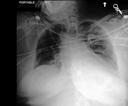
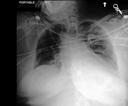
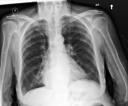
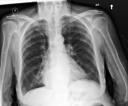
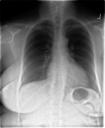
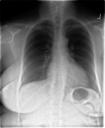
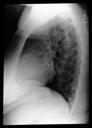
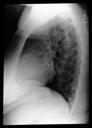
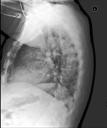
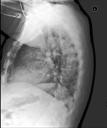

In [119]:
build_setting_dp = build_setting.out(40368).load()
build_setting_dp.head()

In [78]:
dicoms = list(build_setting_dp.lz[build_setting_dp['split']=='test']['dicom_id'])

In [80]:
build_setting_dp.shape

(29998, 73)

In [125]:
baseline_precision = []
for i in range(1000):
    idx = np.random.choice(build_setting_dp.shape[0], 25, replace=True)
    a = np.array(build_setting_dp.lz[idx]['atelectasis'])
    c = np.array(build_setting_dp.lz[idx]['cardiomegaly'])
    baseline_precision.append(np.sum(np.logical_and(a==0,c==1))/25)
print(np.mean(baseline_precision), np.std(baseline_precision))

0.13988 0.06946643506039446

In [44]:
flip = (np.random.rand(100) > 0.2)# * dp["slices"].any(axis=1)


In [50]:
flip *[True]

array([ True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True])

In [51]:
flip

array([ True,  True,  True, False,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True])